In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:


pit_agrs_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pqr60/pqr_60_merge_agrs.csv', header = 2)

pit_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()**2
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.500000,47.250000,0.000000,0.000000e+00
1,4.0,0.750250,26.103875,0.015625,7.966120e+05
2,8.0,0.833667,54.459200,0.006931,8.126329e+06
3,9.0,0.875375,42.308031,0.003891,6.184146e+06
4,12.0,0.799999,53.089421,0.005625,5.961045e+06
...,...,...,...,...,...
6231,59823.0,0.533386,201.787100,0.058510,7.101497e+08
6232,59850.0,0.534319,201.495816,0.058486,7.095731e+08
6233,59853.0,0.535249,201.161157,0.058462,7.097210e+08
6234,59906.0,0.536178,201.156839,0.058437,7.068882e+08


In [6]:
pit_no_agrs_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pqr60/pqr_60_merge_no_agrs.csv', header = 2)

pit_no_agrs_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_no_agrs_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        
# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()**2
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_no_agrs = df_av_at_step
df_no_agrs

,step,reward,length,reward_se,length_se
0,0.0,0.440000,64.120000,0.000000,0.000000e+00
1,8.0,0.720280,51.297190,0.024586,1.077101e+05
2,9.0,0.813707,37.503919,0.010905,5.372689e+05
3,10.0,0.609669,49.162835,0.055418,1.060325e+06
4,12.0,0.688048,42.905313,0.042826,9.337845e+05
...,...,...,...,...,...
6207,59914.0,0.505589,218.103692,0.059367,8.244103e+08
6208,59924.0,0.504579,217.699887,0.059379,8.257984e+08
6209,59940.0,0.505569,217.272912,0.059380,8.277385e+08
6210,59944.0,0.504559,216.892745,0.059392,8.285891e+08


In [7]:
pit_agrs_no_transplant_25_60k = pd.read_csv('../cass_exp/aug23/pqr60/pqr_60_merge_agrs_no_t.csv', header = 2)

pit_agrs_no_transplant_25_60k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pit_agrs_no_transplant_25_60k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()**2
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs_no = df_av_at_step
df_agrs_no


,step,reward,length,reward_se,length_se
0,0.0,0.560000,46.280000,0.000000,0.000000e+00
1,2.0,0.780220,24.117860,0.009370,9.611042e+05
2,4.0,0.853627,16.730490,0.004156,4.263032e+05
3,6.0,0.890330,13.036812,0.002333,2.393159e+05
4,8.0,0.845418,18.250241,0.002137,2.517574e+05
...,...,...,...,...,...
6477,59816.0,0.521699,209.994393,0.058651,7.243769e+08
6478,59839.0,0.520657,210.573826,0.058680,7.305316e+08
6479,59851.0,0.521615,210.790462,0.058668,7.288818e+08
6480,59885.0,0.520572,210.529142,0.058696,7.278132e+08


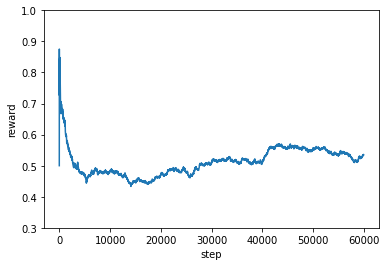

In [8]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_agrs)

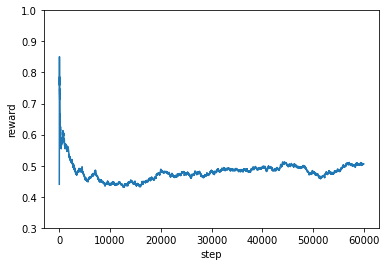

In [9]:
plt.ylim(0.3, 1)
sns.lineplot(x="step", y="reward", data=df_no_agrs)

In [10]:

pal = sns.color_palette('deep')
pal.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

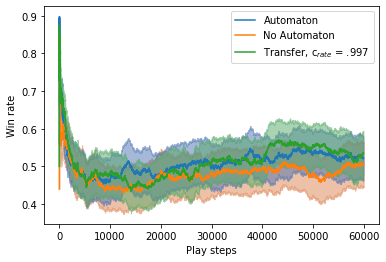

In [11]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, 25x25 Fixed')

sns.lineplot(x="step", y="reward", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_agrs,ax=axs, ci=99)

axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"], 
                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5, color='#dd8452')
axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["reward"] + df_agrs_no["reward_se"], 
                 y2=df_agrs_no["reward"] - df_agrs_no["reward_se"], alpha=.5, color='#4c72b0')

axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"], 
                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5, color='#55a868')
axs.set(xlabel='Play steps', ylabel='Win rate')

axs.legend(['Automaton', 'No Automaton', 'Transfer, c$_{rate}$ = .997'], loc=1)

In [ ]:
fig, axs = plt.subplots(ncols=1)
plt.title('Pqr transplant 25 * 60k steps at 80 expansions')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_agrs_no,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)

axs.set(ylim=(180, 250))
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["length"] + df_no_agrs["length_se"], 
                 #y2=df_no_agrs["length"] - df_no_agrs["length_se"], alpha=.5, color='#55a868')
#axs.fill_between(x=df_agrs_no["step"], y1=df_agrs_no["length"] + df_agrs_no["length_se"], 
                 #y2=df_agrs_no["length"] - df_agrs_no["length_se"], alpha=.5, color='#dd8452')

#axs.fill_between(x=df_agrs["step"], y1=df_agrs["length"] + df_agrs["length_se"], 
                 #y2=df_agrs["length"] - df_agrs["length_se"], alpha=.5, color='#4c72b0')
axs.legend(['Transplant','AGRS-MCTS', 'MCTS'], loc=4)